In [309]:
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
import scipy.signal as sp_sig
import scipy.fft as sp_fft
import seaborn as sns
import pingouin as pg

In [310]:
breaths = ['resting', '6b', '10b', '15b']
tick_labels = ['rest', '6 b/min', '10 b/min', '15 b/min']

df_6b = pd.read_csv('results_etco2[mmHg]_6breaths.csv')
df_10b = pd.read_csv('results_etco2[mmHg]_10breaths.csv')
df_15b = pd.read_csv('results_etco2[mmHg]_15breaths.csv')
df_baseline = pd.read_csv('results_etco2[mmHg]_baseline.csv')
dfs = [df_baseline, df_6b, df_10b, df_15b]

In [311]:
def make_boxplot(dfs, title1, parm1, save_name):
    plt.figure(figsize=(9, 5), dpi=600)
    plt.boxplot([df[parm1] for df in dfs], tick_labels=tick_labels)
    plt.title(title1, fontsize=16)
    plt.ylabel(title1, fontsize=14)
    plt.xlabel('Breathing', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(save_name)

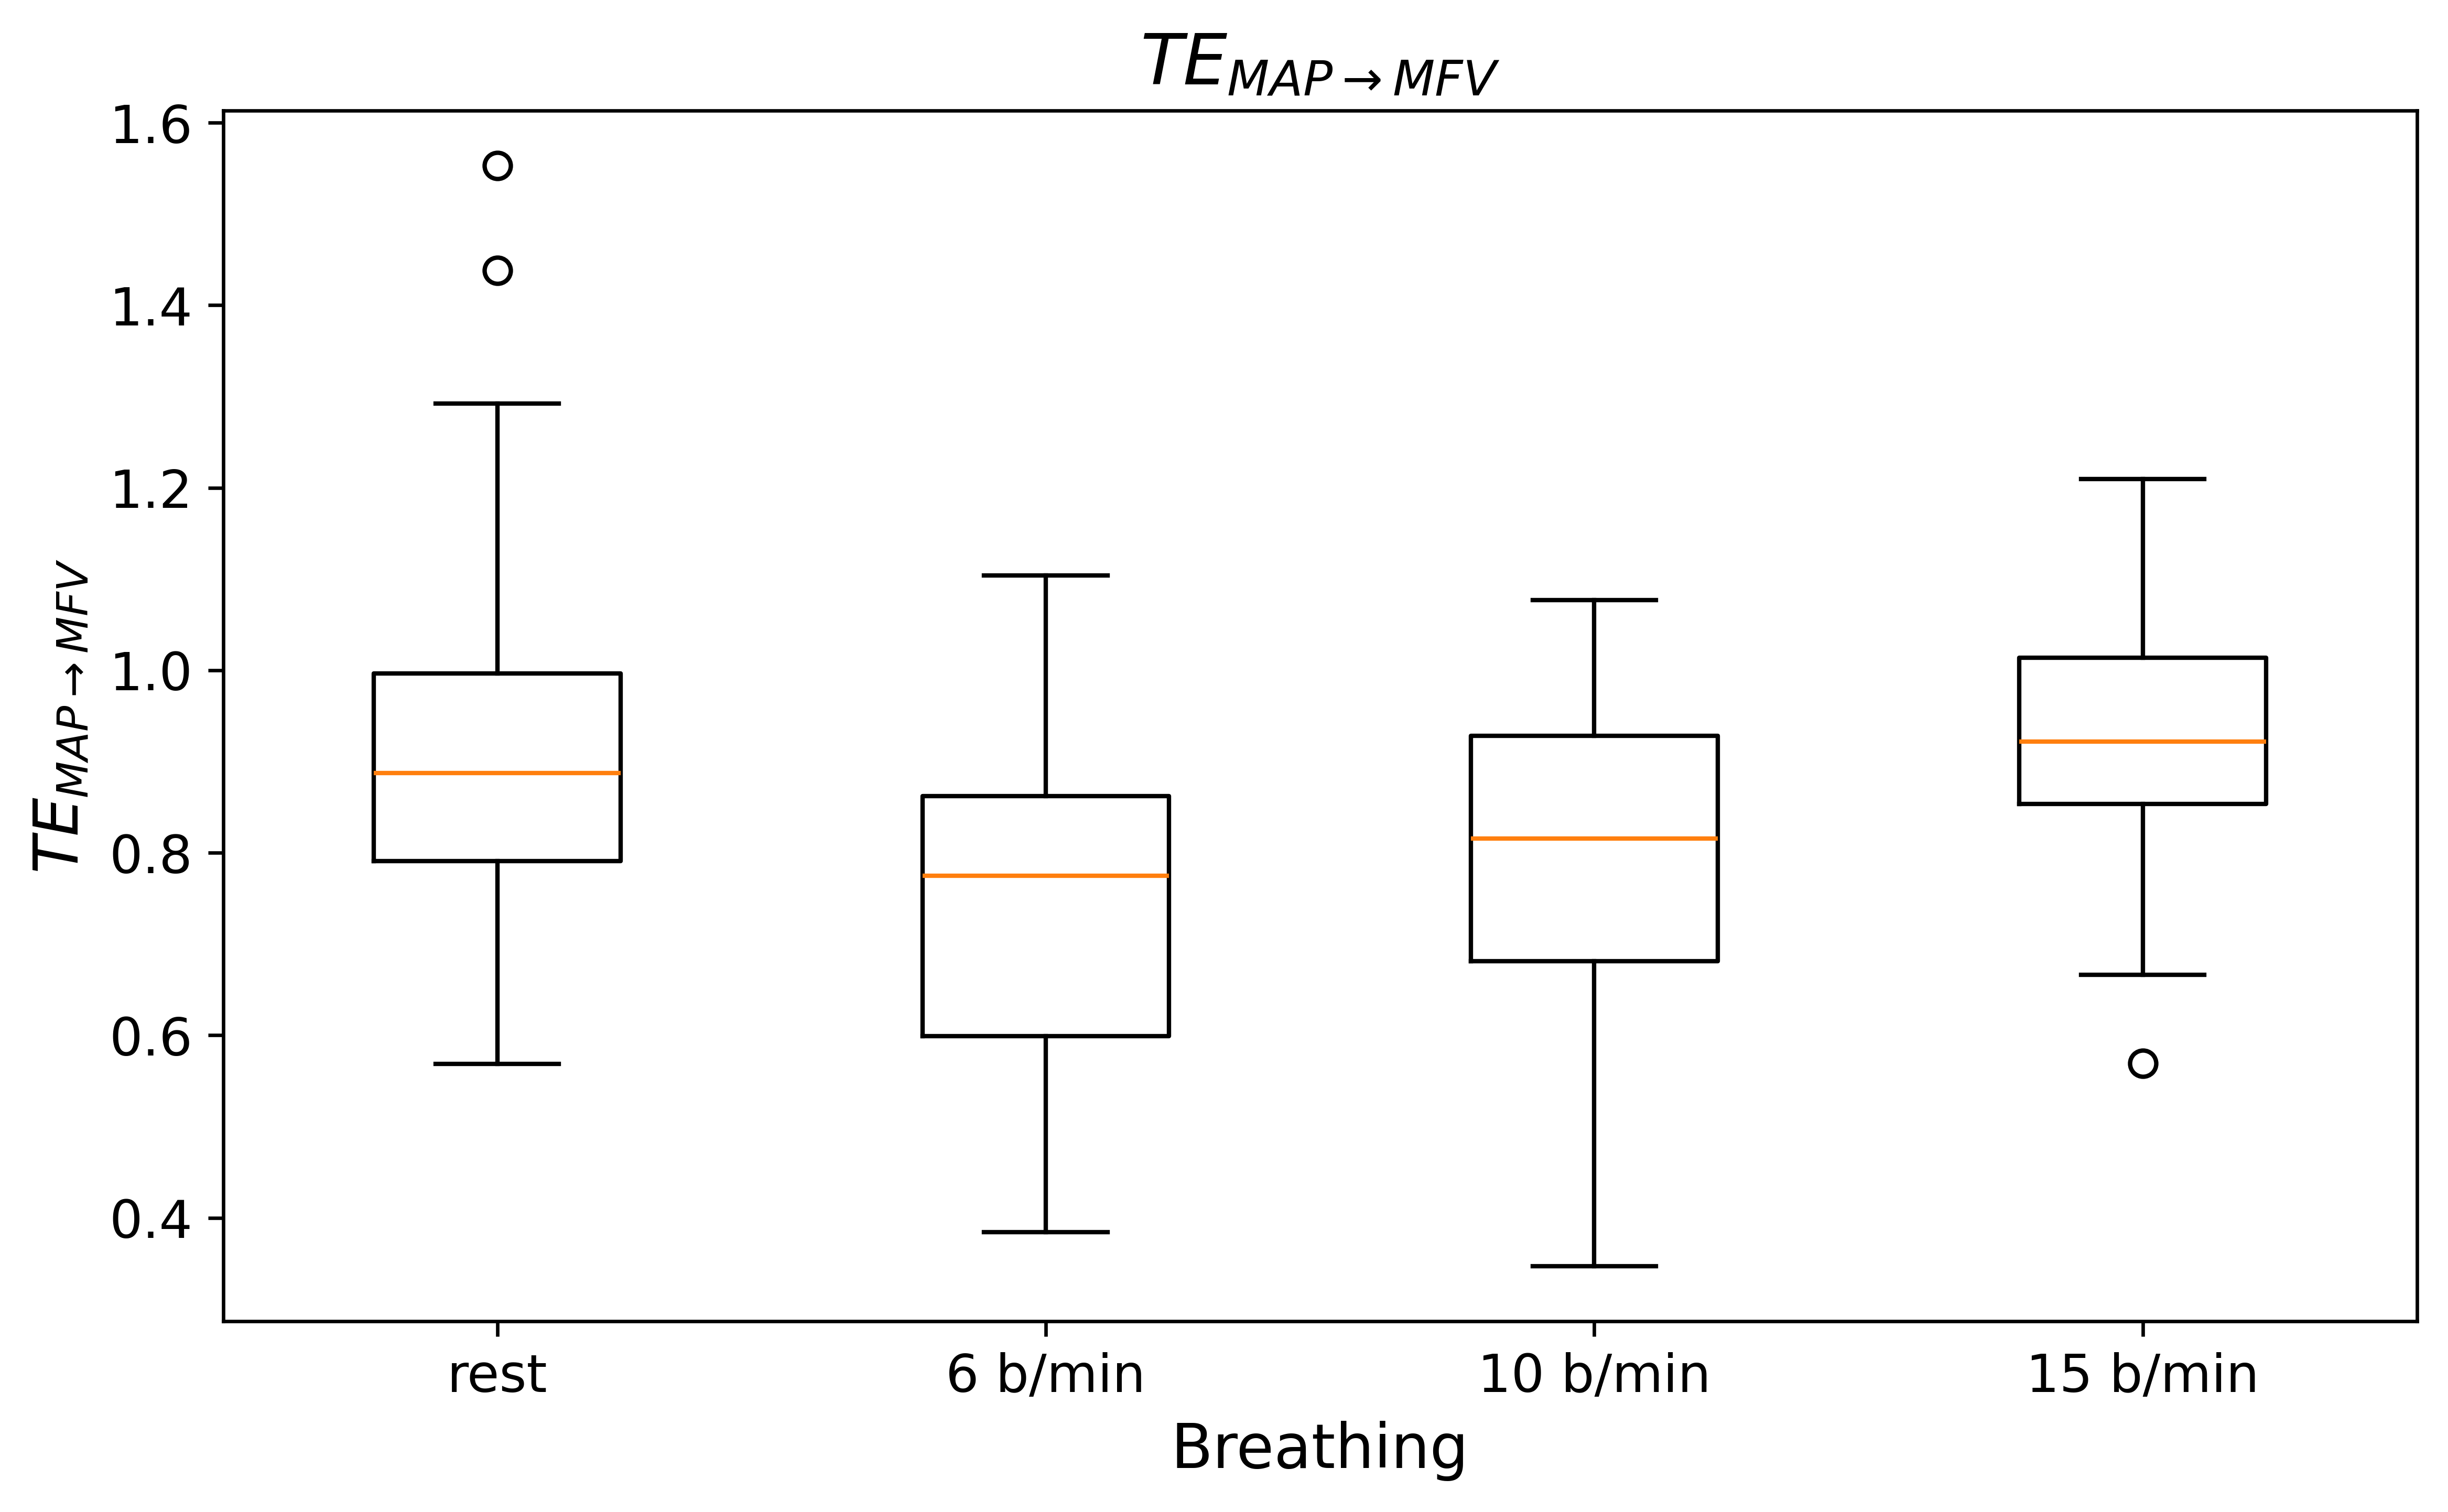

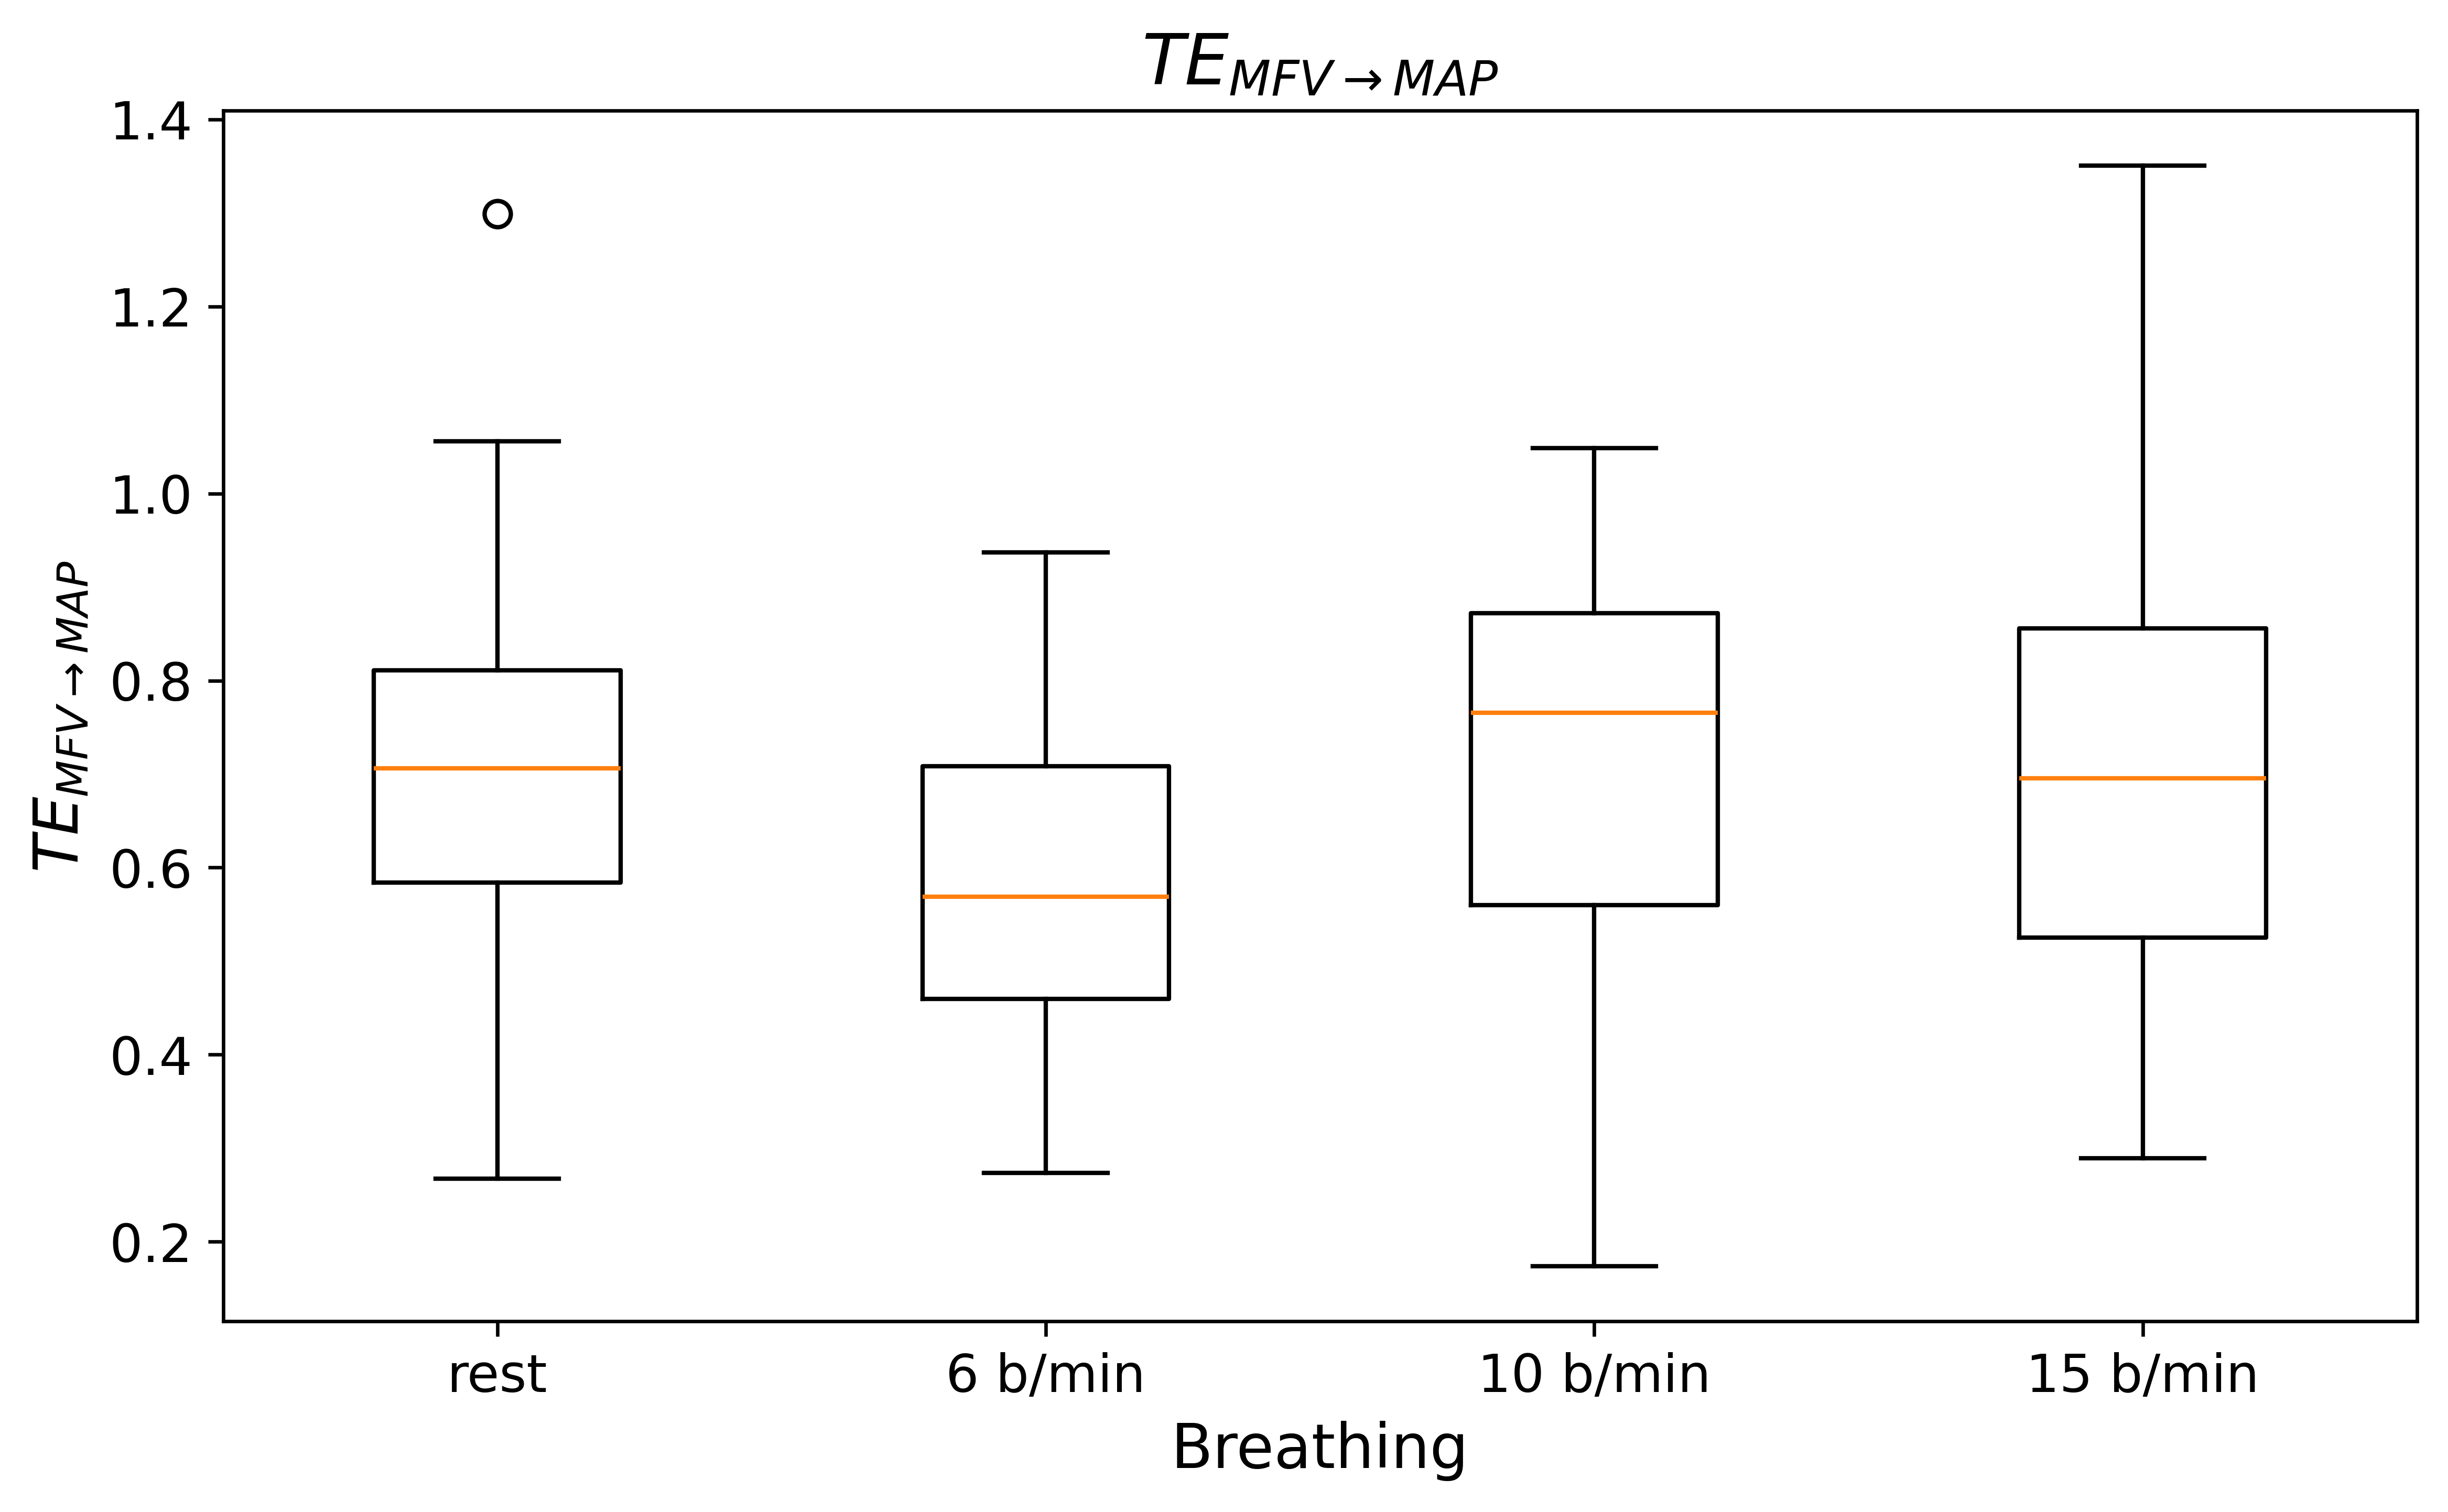

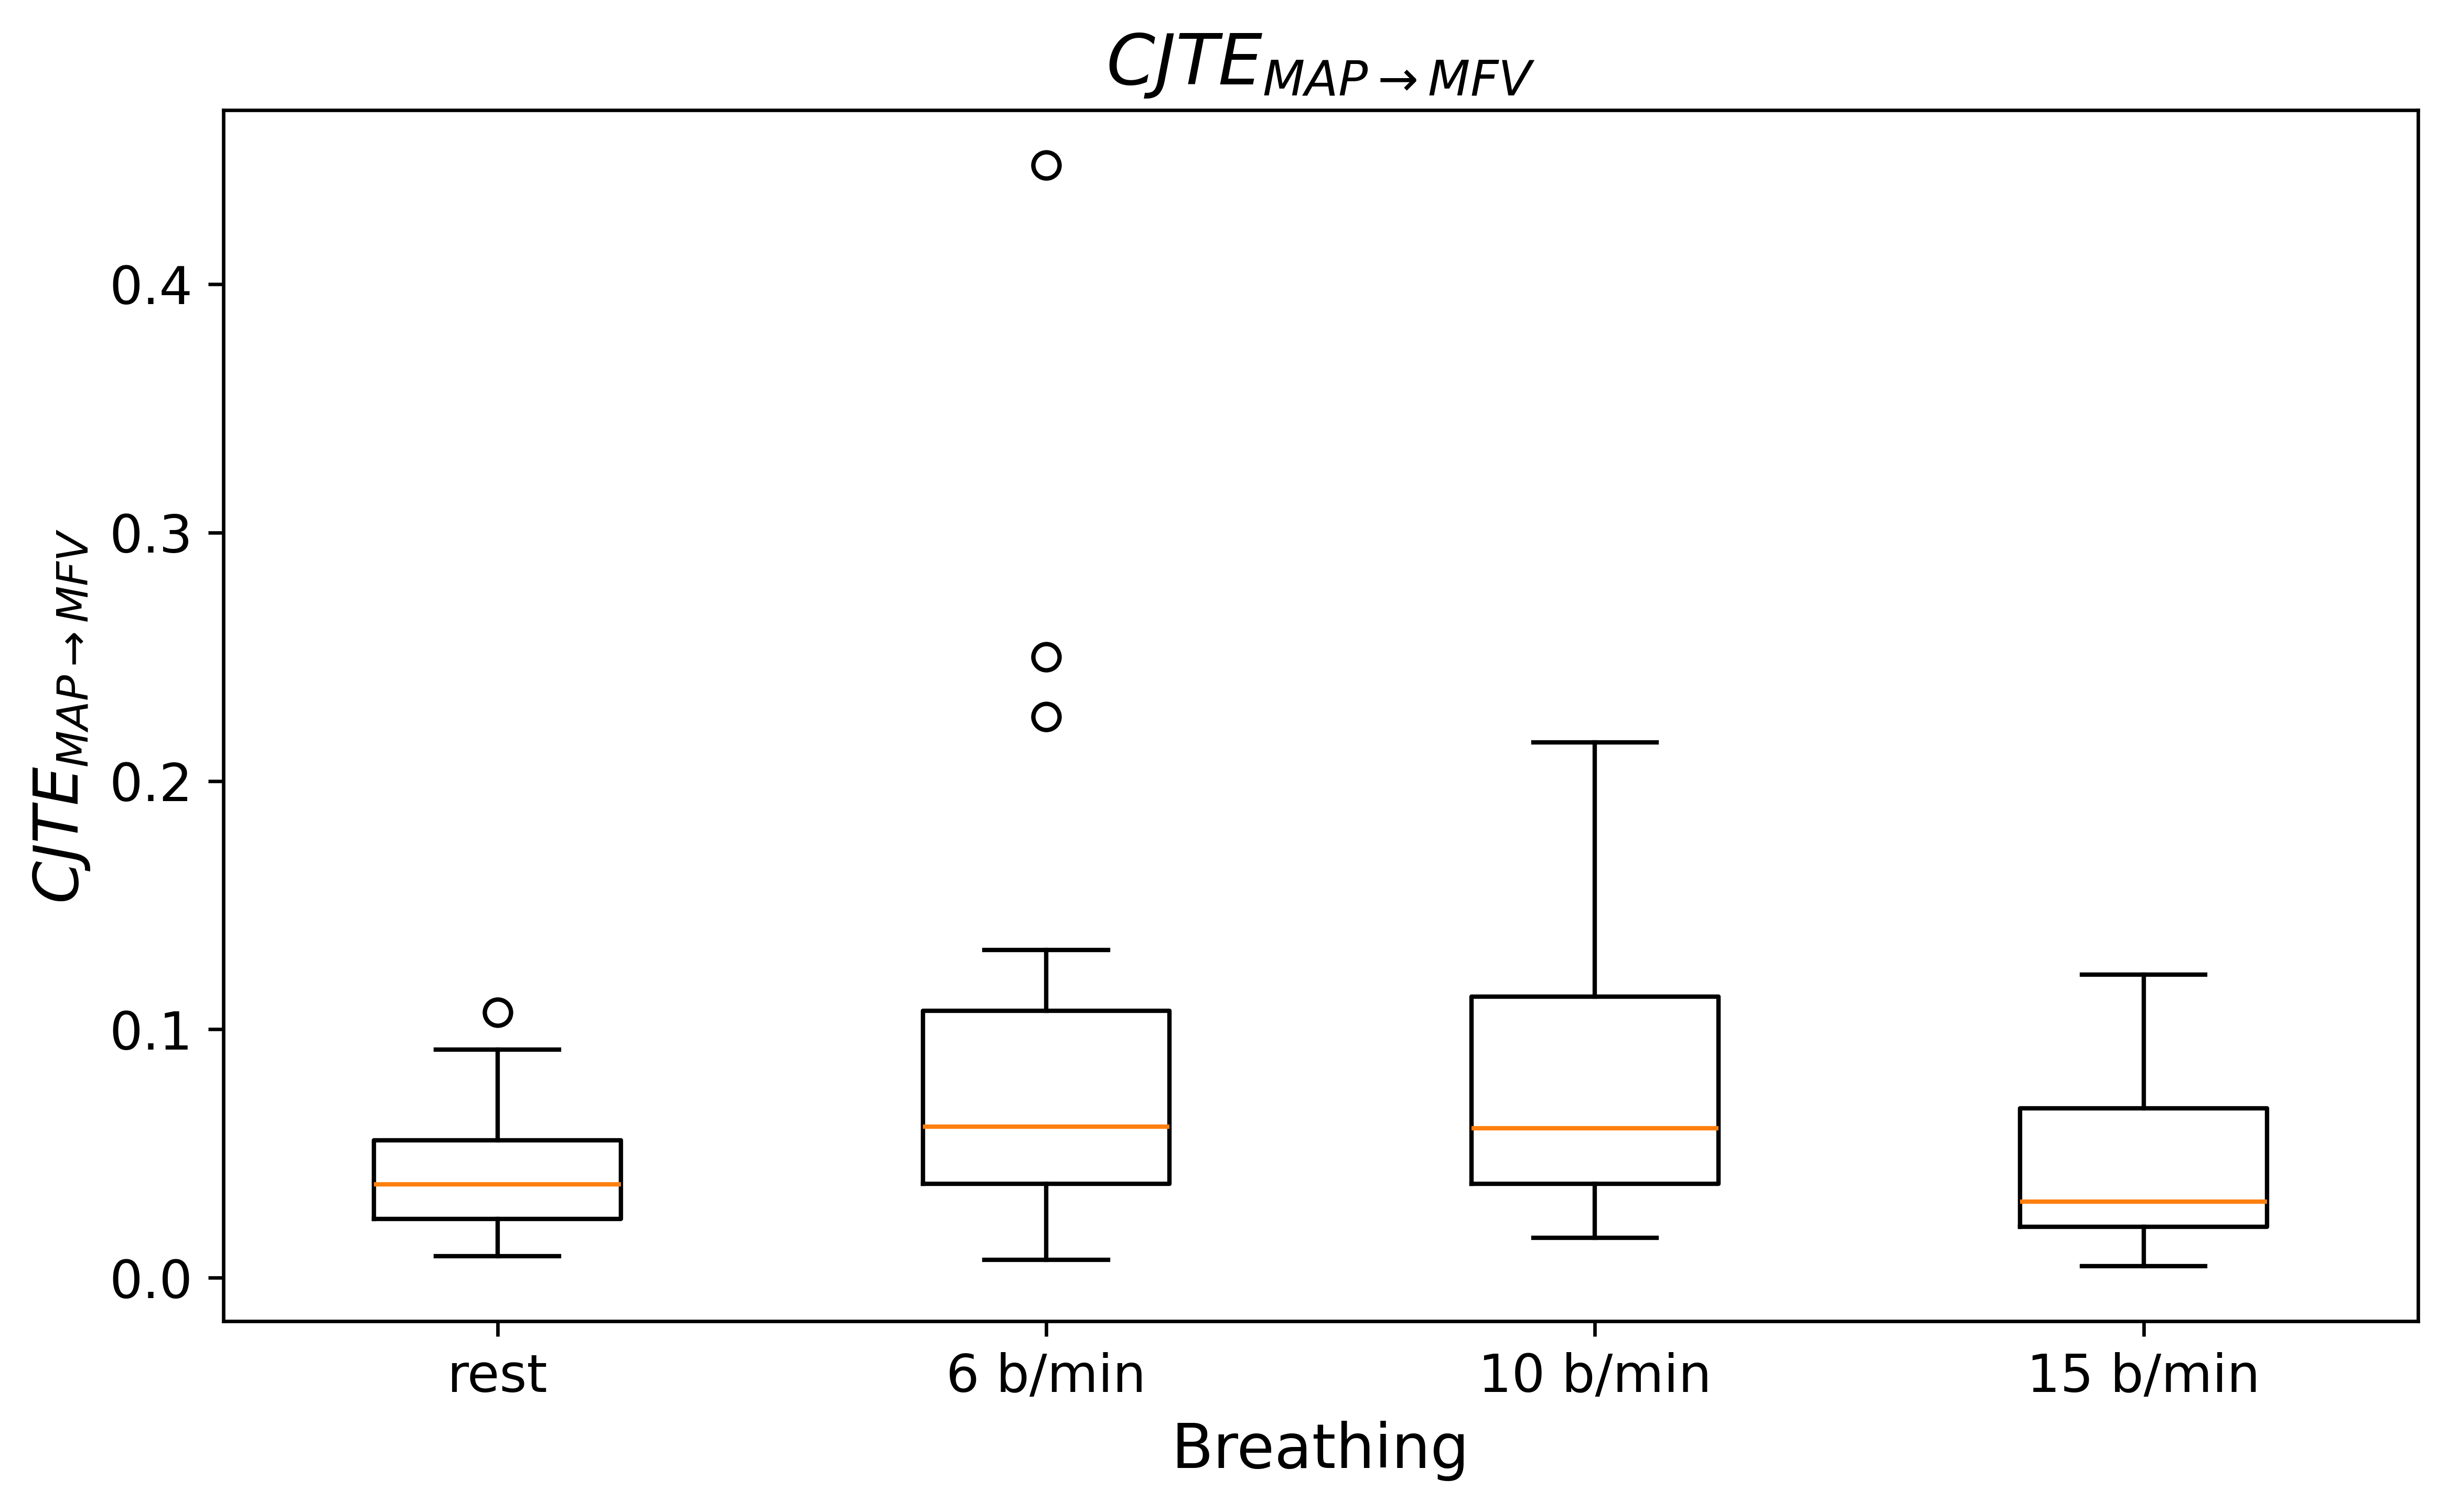

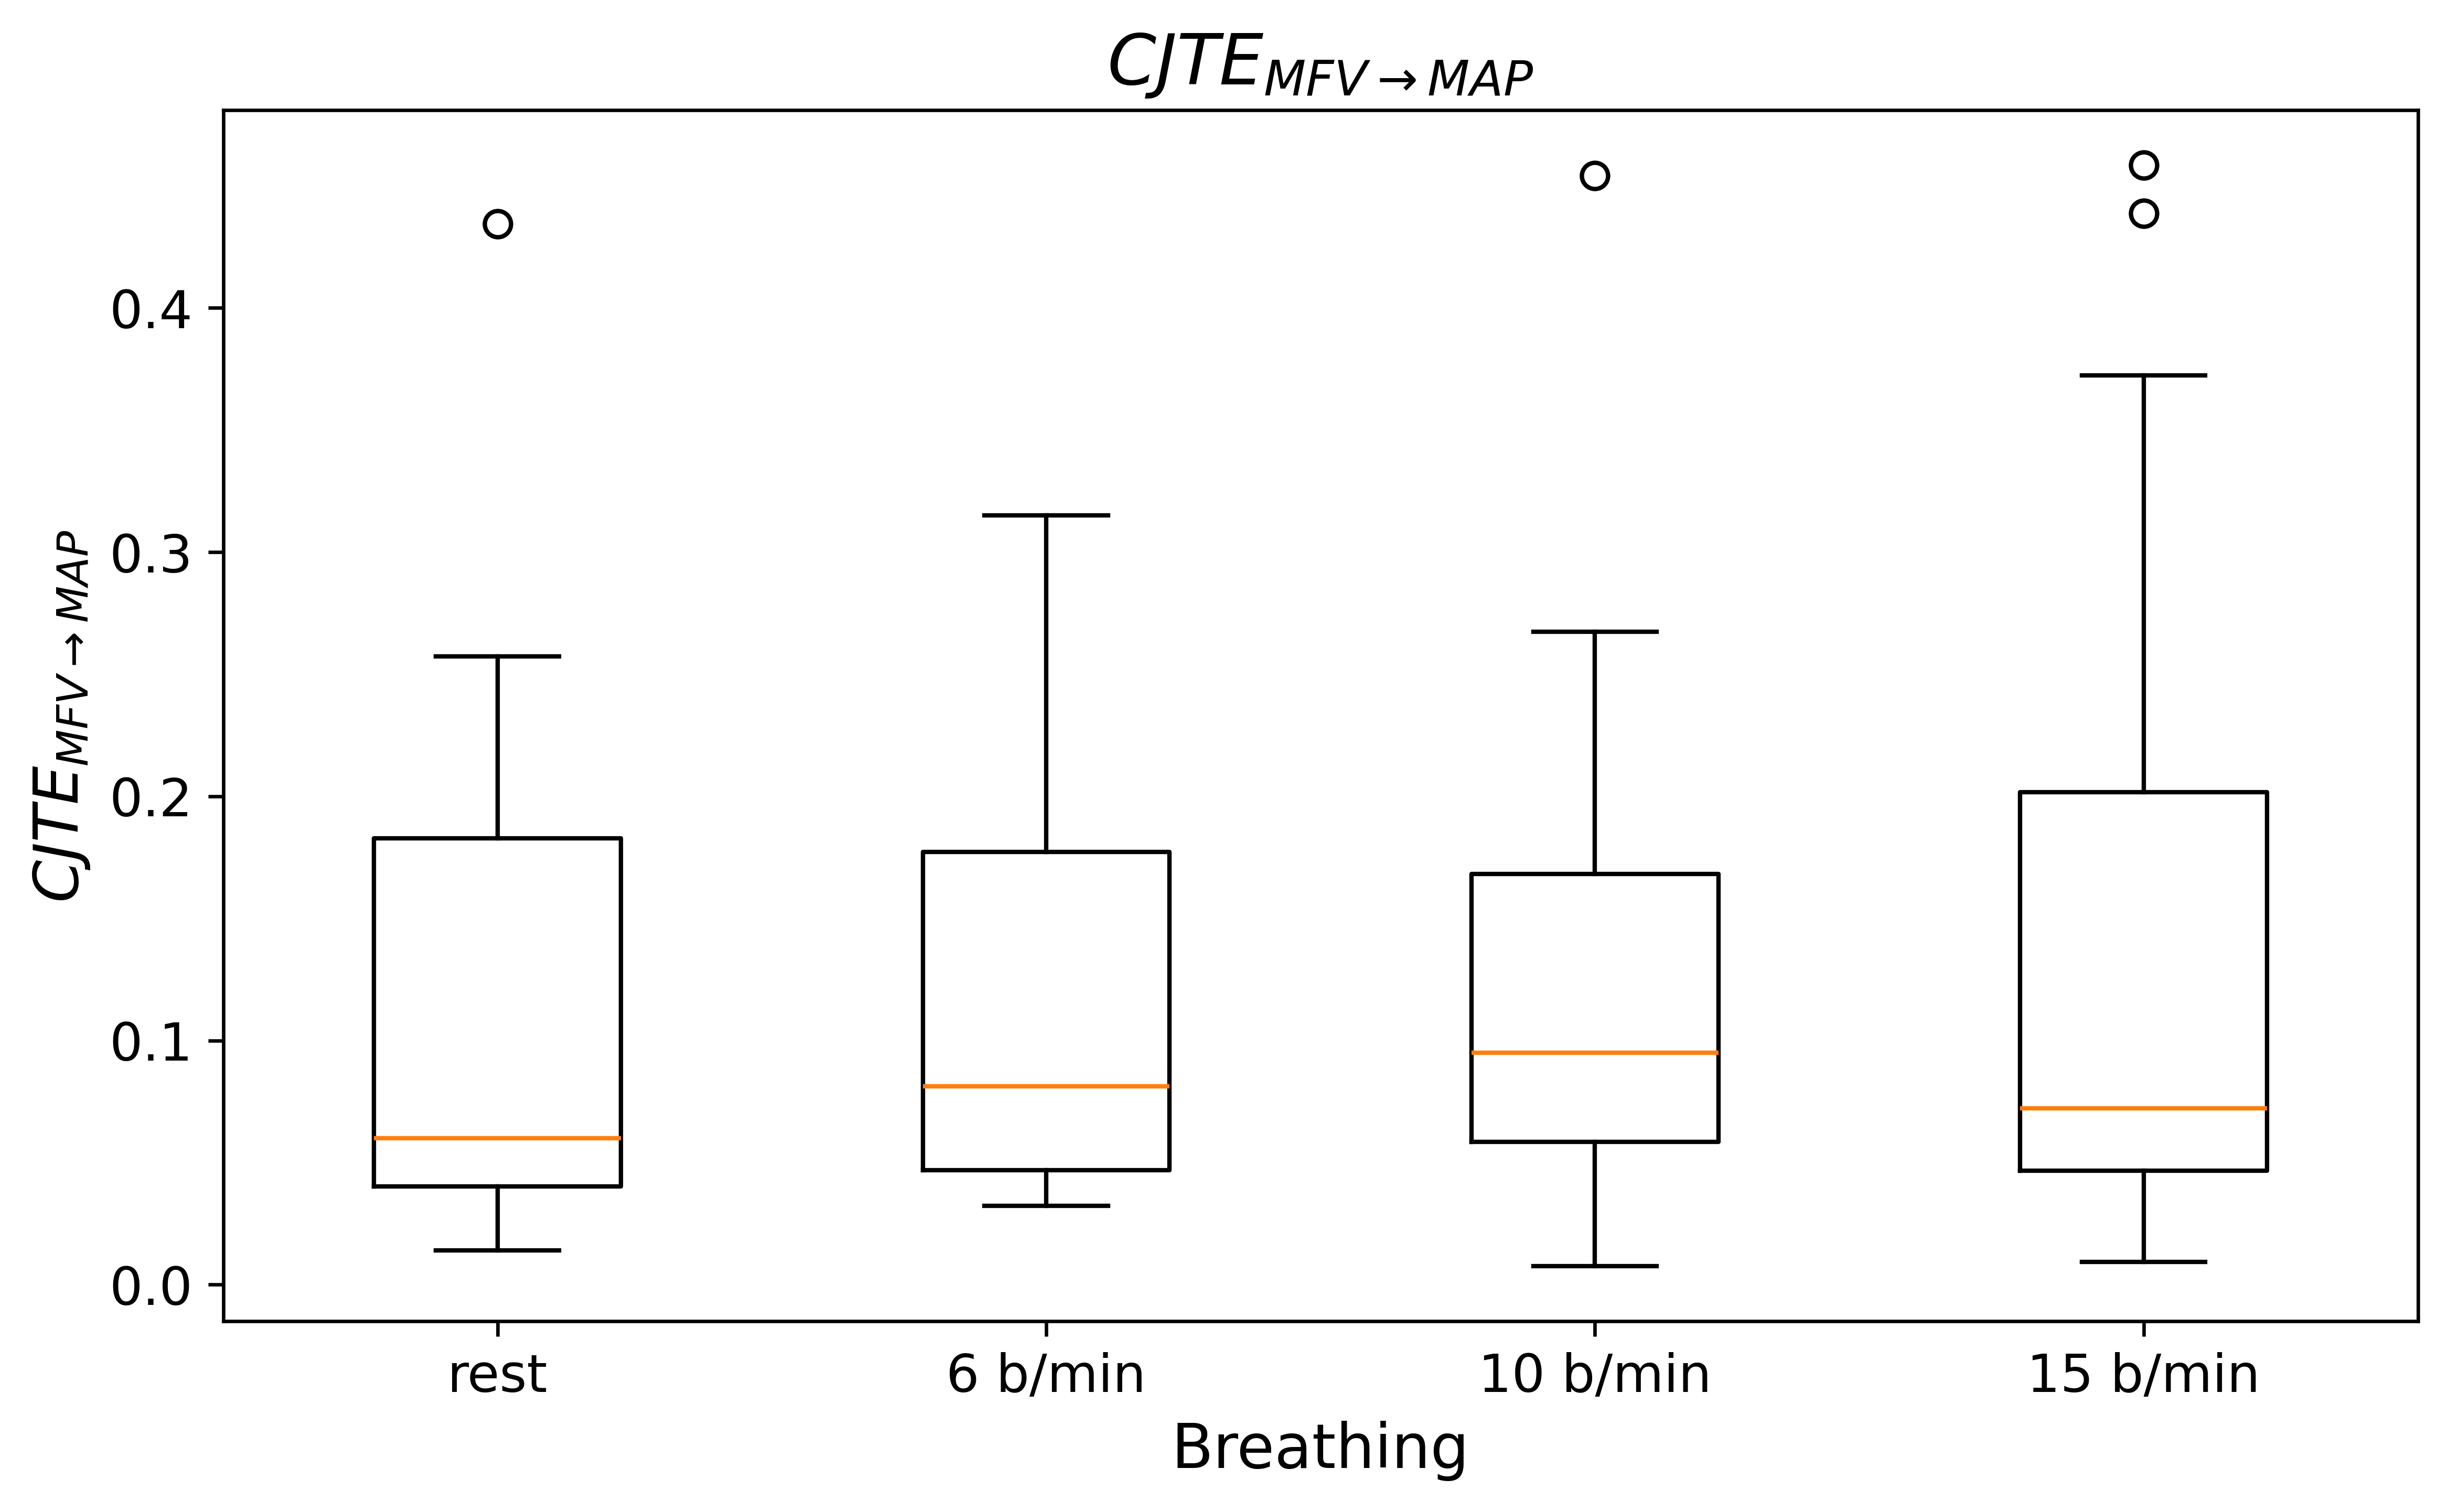

In [312]:
make_boxplot(dfs, r'$TE_{MAP \rightarrow MFV}$', 'te_map_on_mfv', 'teapfv.png')
make_boxplot(dfs, r'$TE_{MFV \rightarrow MAP}$', 'te_mfv_on_map', 'tefvap.png')

make_boxplot(dfs, r'$CJTE_{MAP \rightarrow MFV}$', 'cjte_map_on_mfv', 'cjteapfv.png')
make_boxplot(dfs, r'$CJTE_{MFV \rightarrow MAP}$', 'cjte_mfv_on_map', 'cjtefvap.png')

# Statistical Analysis

In [313]:
median_hr = df_baseline['hr'].median()
is_hr_greater_than_median = df_baseline['hr'] > median_hr
is_hr_greater_than_median.to_numpy()

array([ True, False,  True,  True,  True, False, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True, False])

In [314]:
# make long df for anova
df_long = pd.DataFrame()
df_long['subject'] = np.repeat([df_baseline['id'].values], 4, axis=0).flatten()
df_long['breath'] = np.repeat(breaths, len(df_baseline))
df_long['abp'] = np.concatenate([df['abp'].values for df in dfs])
df_long['map'] = np.concatenate([df['map'].values for df in dfs])
df_long['mfv'] = np.concatenate([df['mcbfv'].values for df in dfs])
df_long['te_map_on_mfv'] = np.concatenate([df['te_map_on_mfv'].values for df in dfs])
df_long['te_mfv_on_map'] = np.concatenate([df['te_mfv_on_map'].values for df in dfs])
df_long['cjte_map_on_mfv'] = np.concatenate([df['cjte_map_on_mfv'].values for df in dfs])
df_long['cjte_mfv_on_map'] = np.concatenate([df['cjte_mfv_on_map'].values for df in dfs])
df_long

,subject,breath,abp,map,mfv,te_map_on_mfv,te_mfv_on_map,cjte_map_on_mfv,cjte_mfv_on_map
0,1,resting,63.082342,61.717290,73.760837,0.818470,0.722664,0.038346,0.053341
1,2,resting,54.677347,61.495849,55.941714,0.883583,0.651115,0.030227,0.041689
2,5,resting,99.525773,97.138443,53.084064,1.292434,1.048265,0.008649,0.035362
3,6,resting,96.765051,104.899574,69.484262,1.552725,1.298813,0.030664,0.036265
4,8,resting,66.513653,66.351659,64.470898,0.987764,0.527491,0.023982,0.054619
...,...,...,...,...,...,...,...,...,...
91,32,15b,108.226961,134.432506,40.053207,0.692664,0.895600,0.017558,0.458315
92,33,15b,79.880562,85.817536,56.495263,0.913789,0.618126,0.095348,0.074873
93,34,15b,125.025669,124.662726,50.059548,1.055963,1.018083,0.057444,0.228466
94,36,15b,106.292842,114.653097,67.202480,0.569295,0.289353,0.017621,0.059777


## Repeated Measures ANOVA

In [315]:
variables = ['abp', 'map', 'mfv', 'te_map_on_mfv', 'te_mfv_on_map', 'cjte_map_on_mfv', 'cjte_mfv_on_map']

In [316]:
for var in variables:
    anova = pg.rm_anova(
    dv=var,
    within='breath',
    subject='subject',
    data=df_long
    )
    print(f"ANOVA results for {var}:")
    print(anova)
    print("\n")

ANOVA results for abp:
   Source  ddof1  ddof2         F     p-unc       ng2       eps
0  breath      3     69  1.471018  0.230038  0.012967  0.827599


ANOVA results for map:
   Source  ddof1  ddof2         F     p-unc       ng2       eps
0  breath      3     69  1.134162  0.341417  0.012631  0.809482


ANOVA results for mfv:
   Source  ddof1  ddof2         F         p-unc     p-GG-corr       ng2  \
0  breath      3     69  58.56124  6.164600e-19  1.733071e-14  0.305472   

        eps  sphericity   W-spher   p-spher  
0  0.733424       False  0.545702  0.022086  


ANOVA results for te_map_on_mfv:
   Source  ddof1  ddof2         F     p-unc  p-GG-corr       ng2       eps  \
0  breath      3     69  5.172449  0.002778   0.009916  0.137299  0.652634   

   sphericity   W-spher   p-spher  
0       False  0.364912  0.000556  


ANOVA results for te_mfv_on_map:
   Source  ddof1  ddof2         F     p-unc       ng2       eps
0  breath      3     69  1.394908  0.251715  0.041854  0.835879



In [317]:
posthoc = pg.pairwise_tests(
    dv='mfv',
    within='breath',
    subject='subject',
    data=df_long,
    padjust='bonferroni',
)
posthoc = posthoc[['A', 'B', 'p-corr']]
posthoc= posthoc[posthoc['p-corr'] < 0.05]
posthoc

,A,B,p-corr
2,10b,resting,2.546114e-10
4,15b,resting,2.259258e-09
5,6b,resting,3.483272e-06


In [318]:
posthoc = pg.pairwise_tests(
    dv='te_map_on_mfv',
    within='breath',
    subject='subject',
    data=df_long,
    padjust='bonferroni',
)
posthoc = posthoc[['A', 'B', 'p-corr']]
posthoc= posthoc[posthoc['p-corr'] < 0.05]
posthoc

,A,B,p-corr
0,10b,15b,0.00733
3,15b,6b,0.00007


In [319]:
posthoc = pg.pairwise_tests(
    dv='cjte_map_on_mfv',
    within='breath',
    subject='subject',
    data=df_long,
    padjust='bonferroni',
)
posthoc = posthoc[['A', 'B', 'p-corr']]
posthoc= posthoc[posthoc['p-corr'] < 0.05]
posthoc

,A,B,p-corr
2,10b,resting,0.03053


In [320]:
def read_fv(df):
    possible_fv_names = ['fvl', 'fvr']
    fvl = df['fvl'].values
    fvr = df['fvr'].values
    fvl_mean = np.mean(fvl)
    fvr_mean = np.mean(fvr)

    if fvl_mean > 30:
        return fvl
    elif fvr_mean > 30:
        return fvr
    else:
        return None

In [321]:
def find_peaks(
    signal: np.array,
    sampling_rate: int = 200,
    mindelay: float = 0.3,
) -> np.array:    
    # Fill missing values
    filled_signal = nk.signal_fillmissing(signal)
    cleaned_signal = nk.ppg_clean(filled_signal, sampling_rate=sampling_rate, method="elgendi")
    peaks_up = nk.ppg_findpeaks(
        cleaned_signal, sampling_rate=sampling_rate, method="elgendi", mindelay=mindelay
    )['PPG_Peaks']
    peaks_down = nk.ppg_findpeaks(
        cleaned_signal * -1, sampling_rate=sampling_rate, method="elgendi", mindelay=mindelay
    )['PPG_Peaks']
    return peaks_up, peaks_down

In [322]:
def get_map(signal, peaks_up, peaks_down):
    peaks = np.sort(np.concatenate((peaks_up, peaks_down)))
    first_peak = 0 if peaks[0] < peaks[1] else 1

    # MAP = (2*DP + SP) / 3
    map_ = []
    for i in range(first_peak, len(peaks)-2, 2):
        dp = signal[peaks[i]]
        sp = signal[peaks[i+1]]
        map_.append((2*dp + sp) / 3)
    
    return np.array(map_)

def get_mfv(signal, peaks):
    mfv = np.array([np.mean(signal[peaks[i-1]:peaks[i]]) for i, _ in enumerate(peaks) if i > 0])
    return mfv

In [323]:
DPI=600

def plot_abp_signal_w_peaks(signal: np.array, peaks: np.array, start: int, end: int):
    plt.figure(figsize=(8, 5), dpi=DPI)
    plt.plot(signal[start:end])
    plt.xlim([0, end-start])
    peaks = peaks[(peaks > start) & (peaks < end)]
    plt.scatter(peaks-start, signal[peaks], c='r')
    plt.annotate('DP(i)', xy=(peaks[2]-start-1, signal[peaks[2]]-1), xytext=(peaks[2]-start-75, signal[peaks[2]]-5),
                arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')
    plt.annotate('SP(i)', xy=(peaks[3]-start-1, signal[peaks[3]]+1), xytext=(peaks[3]-start-75, signal[peaks[3]]+3),
                arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')


    plt.title('ABP signal', fontsize=16)
    plt.xlabel('Miliseconds', fontsize=14)
    plt.ylabel('ABP [mmHg]', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.savefig('abp_signal.png')
    plt.show()

def plot_fv_signal_w_peaks(signal: np.array, peaks: np.array, start: int, end: int):
    plt.figure(figsize=(8, 5), dpi=DPI)
    plt.plot(signal[start:end])
    plt.xlim([0, end-start])
    peaks = peaks[(peaks > start) & (peaks < end)]
    plt.scatter(peaks-start, signal[peaks], c='r')

    plt.title('FV signal', fontsize=16)
    plt.xlabel('Miliseconds', fontsize=14)
    plt.ylabel('FV [cm/s]', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.savefig('fv_signal.png')
    plt.show()

def plot_map_signal(signal: np.array, start: int, end: int):
    plt.figure(figsize=(8, 5), dpi=DPI)
    plt.plot(signal[start:end])
    plt.xlim([0, end-start])

    plt.title('MAP signal', fontsize=16)
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('MAP [mmHg]', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.savefig('map_signal.png')
    plt.show()

def plot_mfv_signal(signal: np.array, start: int, end: int):
    plt.figure(figsize=(8, 5), dpi=DPI)
    plt.plot(signal[start:end])
    plt.xlim([0, end-start])

    plt.title('MFV signal', fontsize=16)
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('MFV [cm/s]', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.savefig('mfv_signal.png')
    plt.show()

In [324]:
location_baseline = lambda on: f'../data/CONTROL_BREATHING_RECORDINGS/OCHOTNIK_{on}/CLEAN_DATA_BASELINE/OCH_{on}_CLEAN_CB_BASELINE.csv'

In [325]:
df = pd.read_csv(location_baseline(1), sep=';', decimal=',')
abp = df['abp_cnap[mmHg]'].values
fv = read_fv(df)

In [326]:
abp_peaks_up, abp_peaks_down = find_peaks(abp, mindelay=0.3)
abp_peaks = np.sort(np.concatenate((abp_peaks_up, abp_peaks_down)))

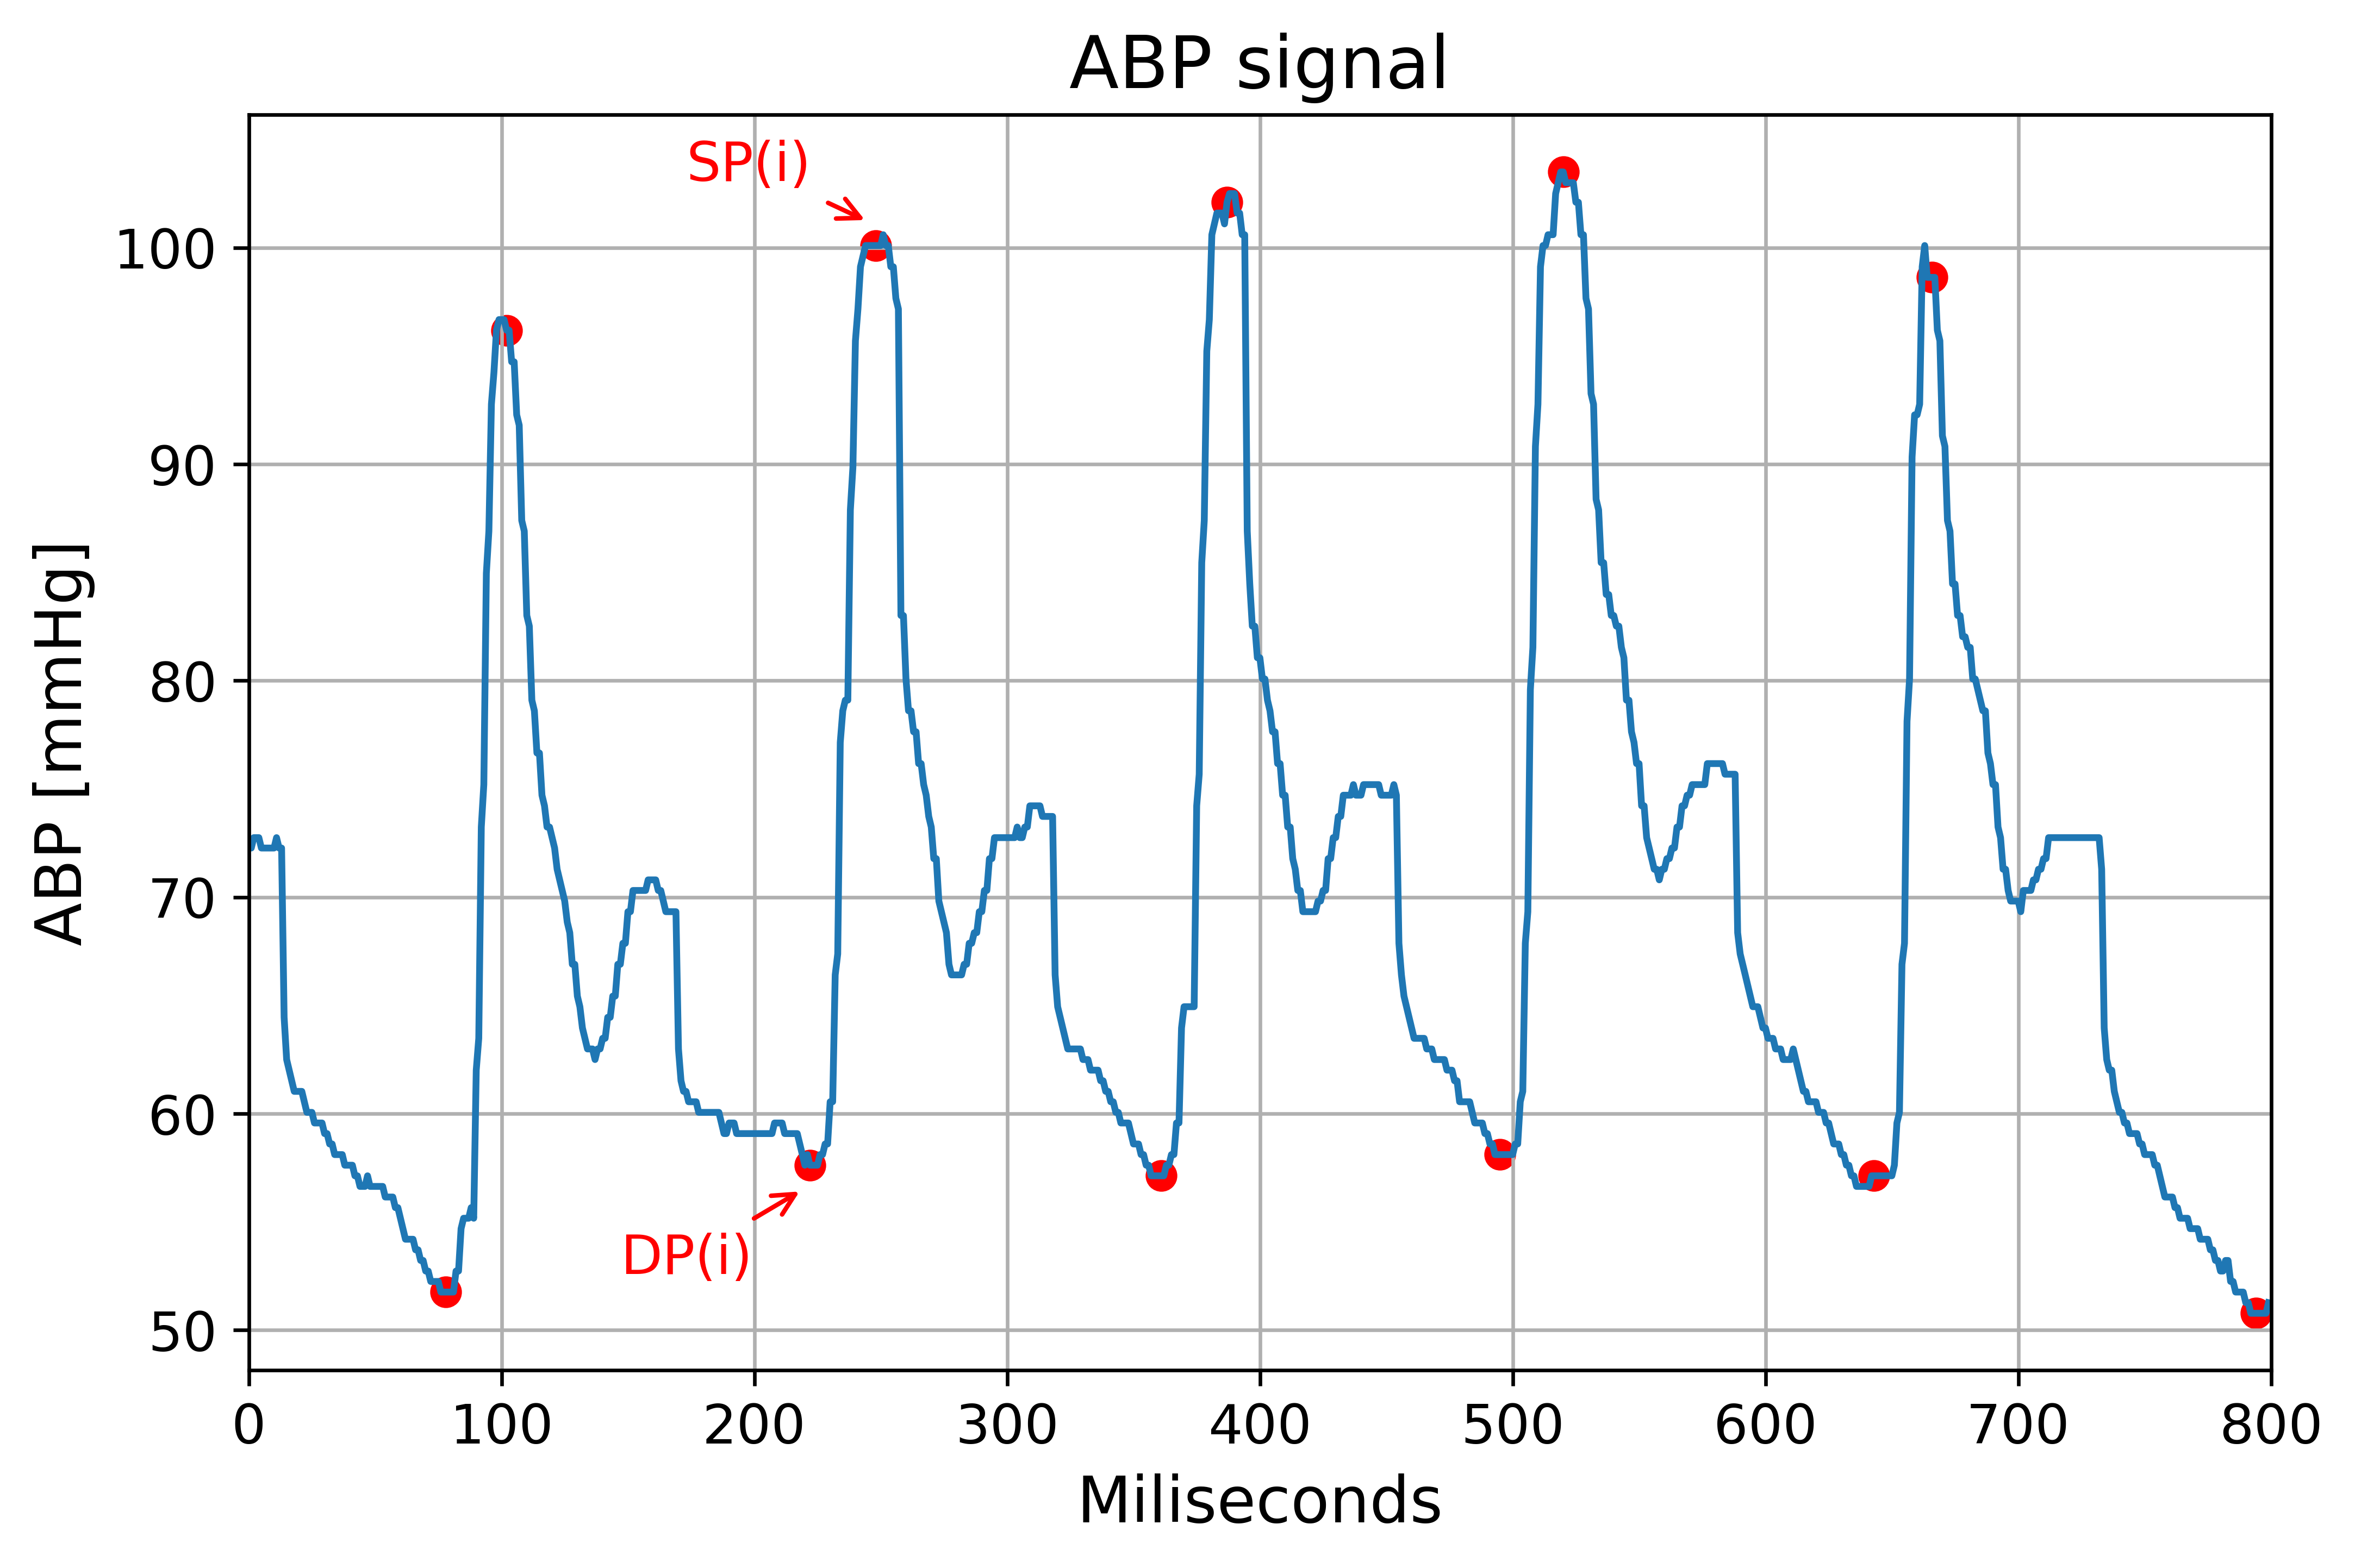

In [327]:
plot_abp_signal_w_peaks(abp, abp_peaks, 0, 800)

In [328]:
_, fv_peaks_down = find_peaks(fv, mindelay=0.3)

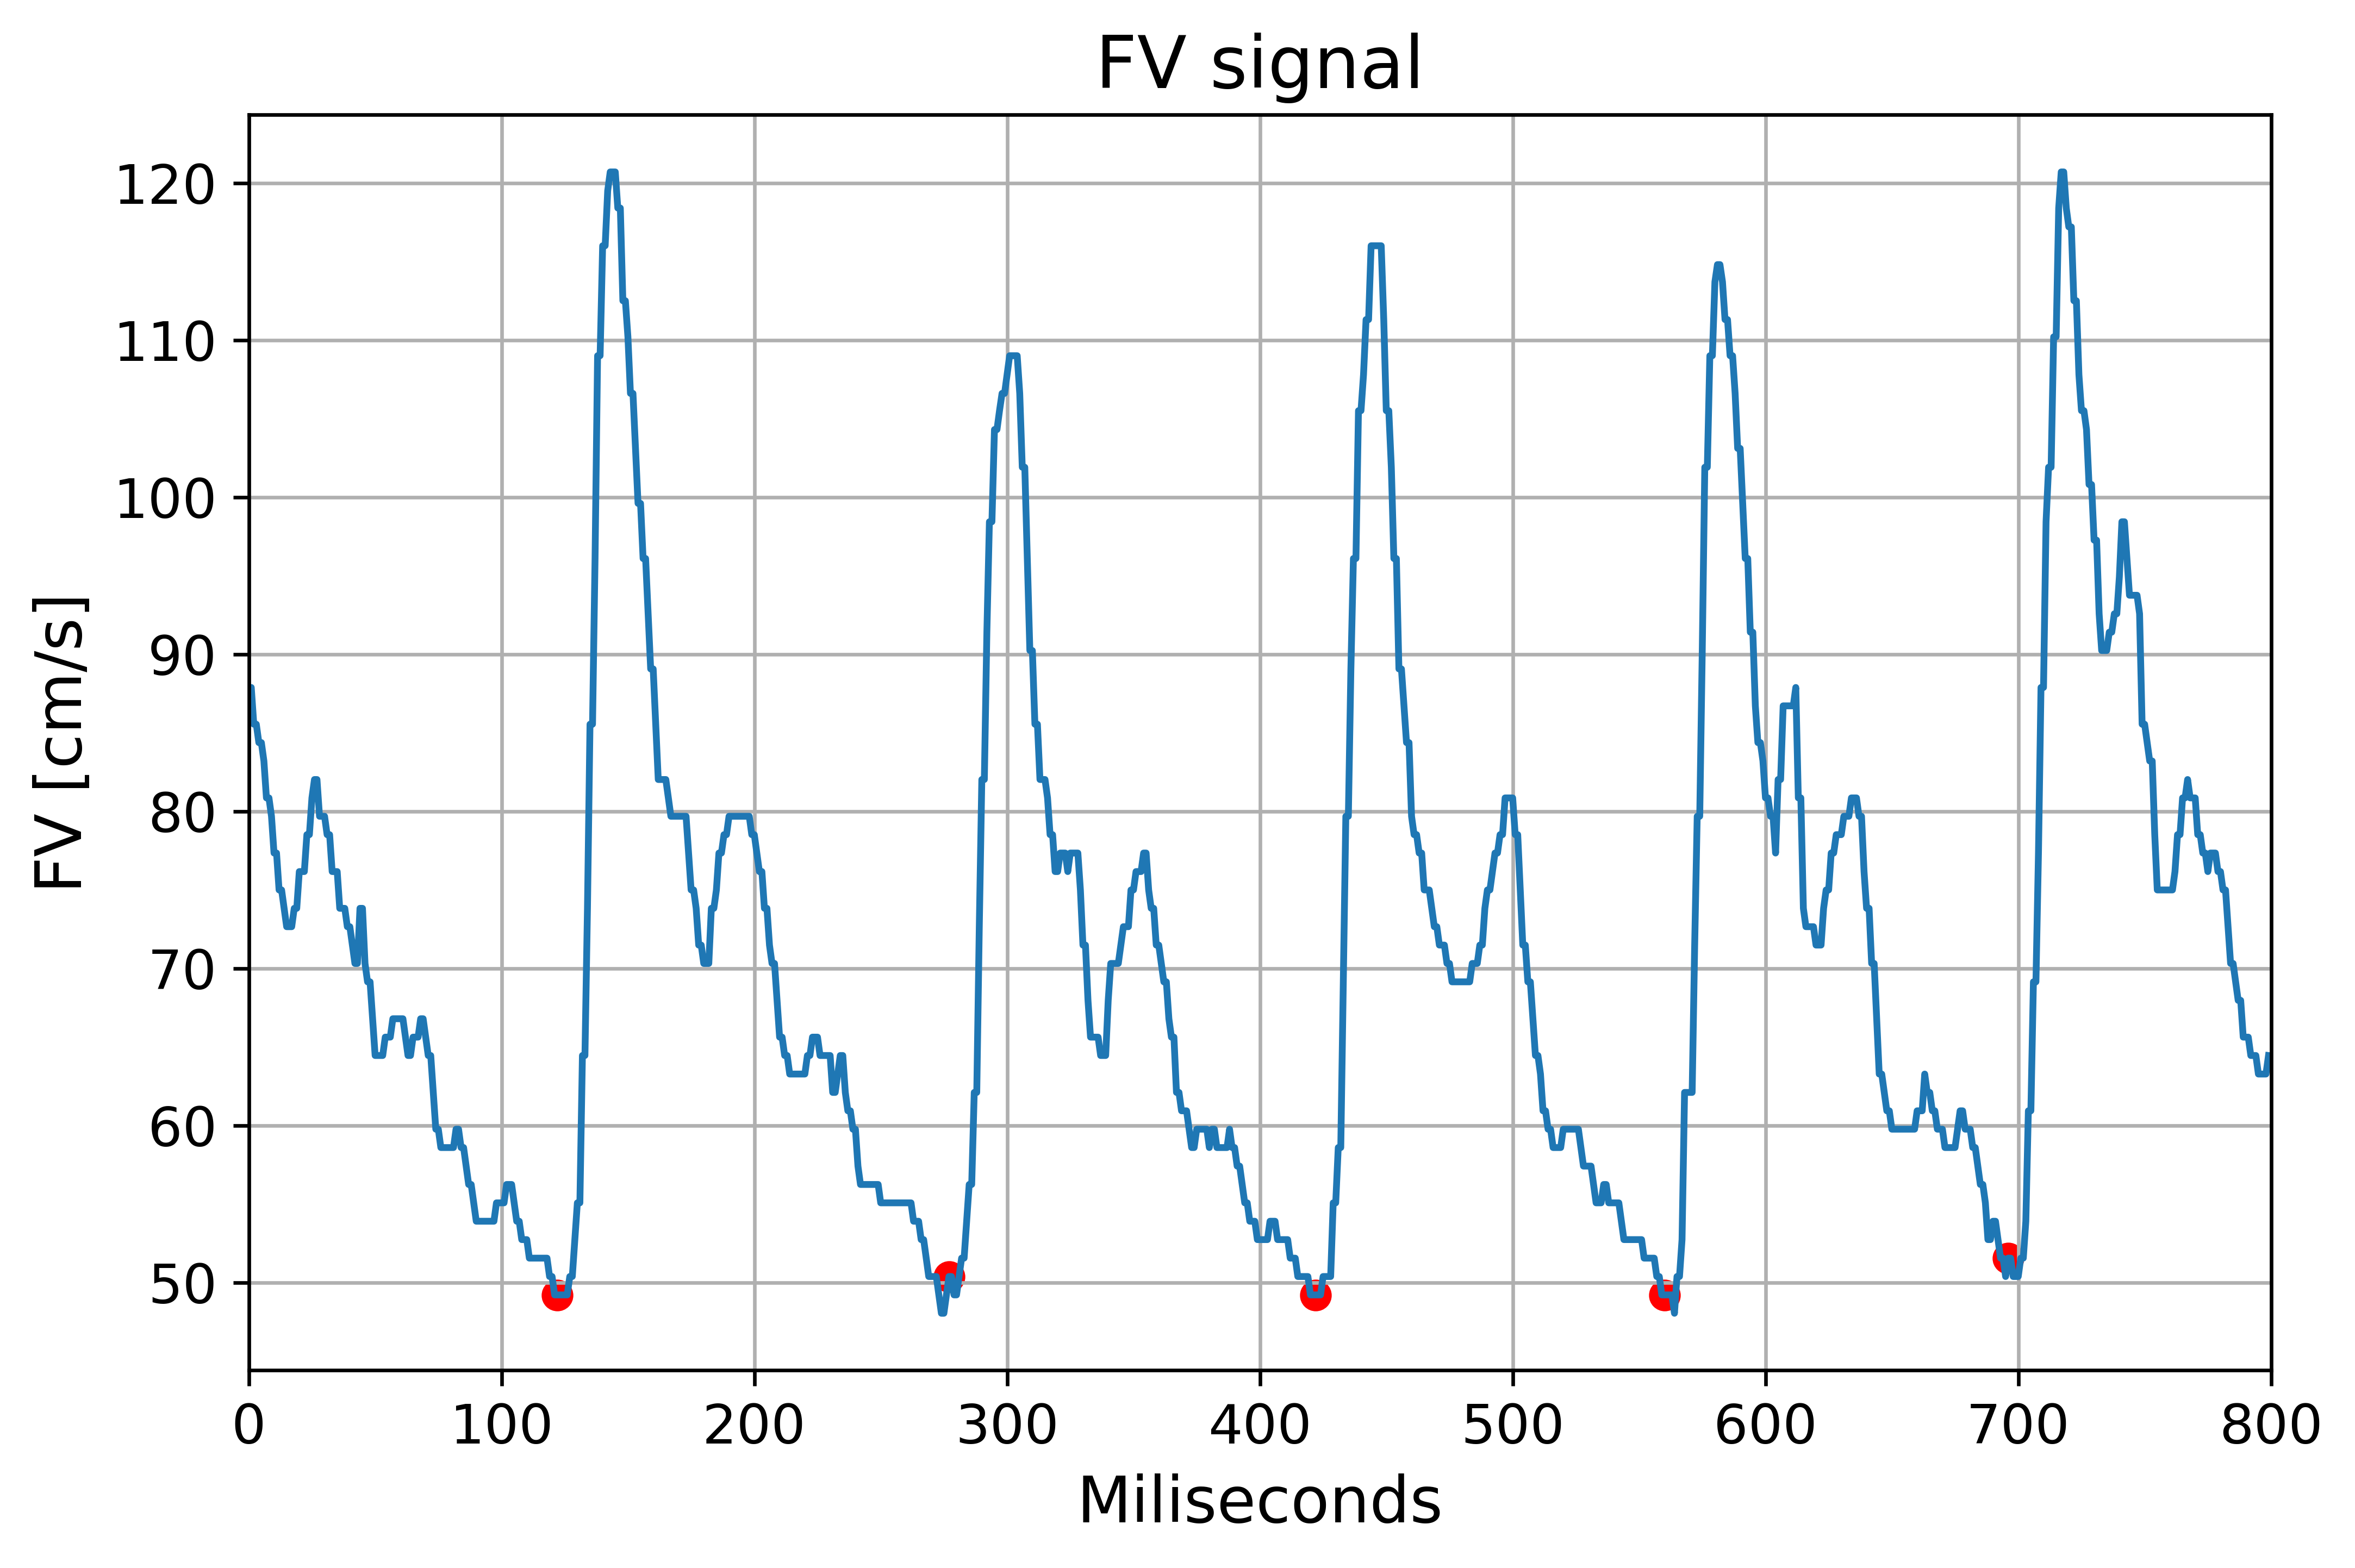

In [329]:
plot_fv_signal_w_peaks(fv, fv_peaks_down, 0, 800)

In [330]:
map = get_map(abp, abp_peaks_up, abp_peaks_down)
mfv = get_mfv(fv, fv_peaks_down)

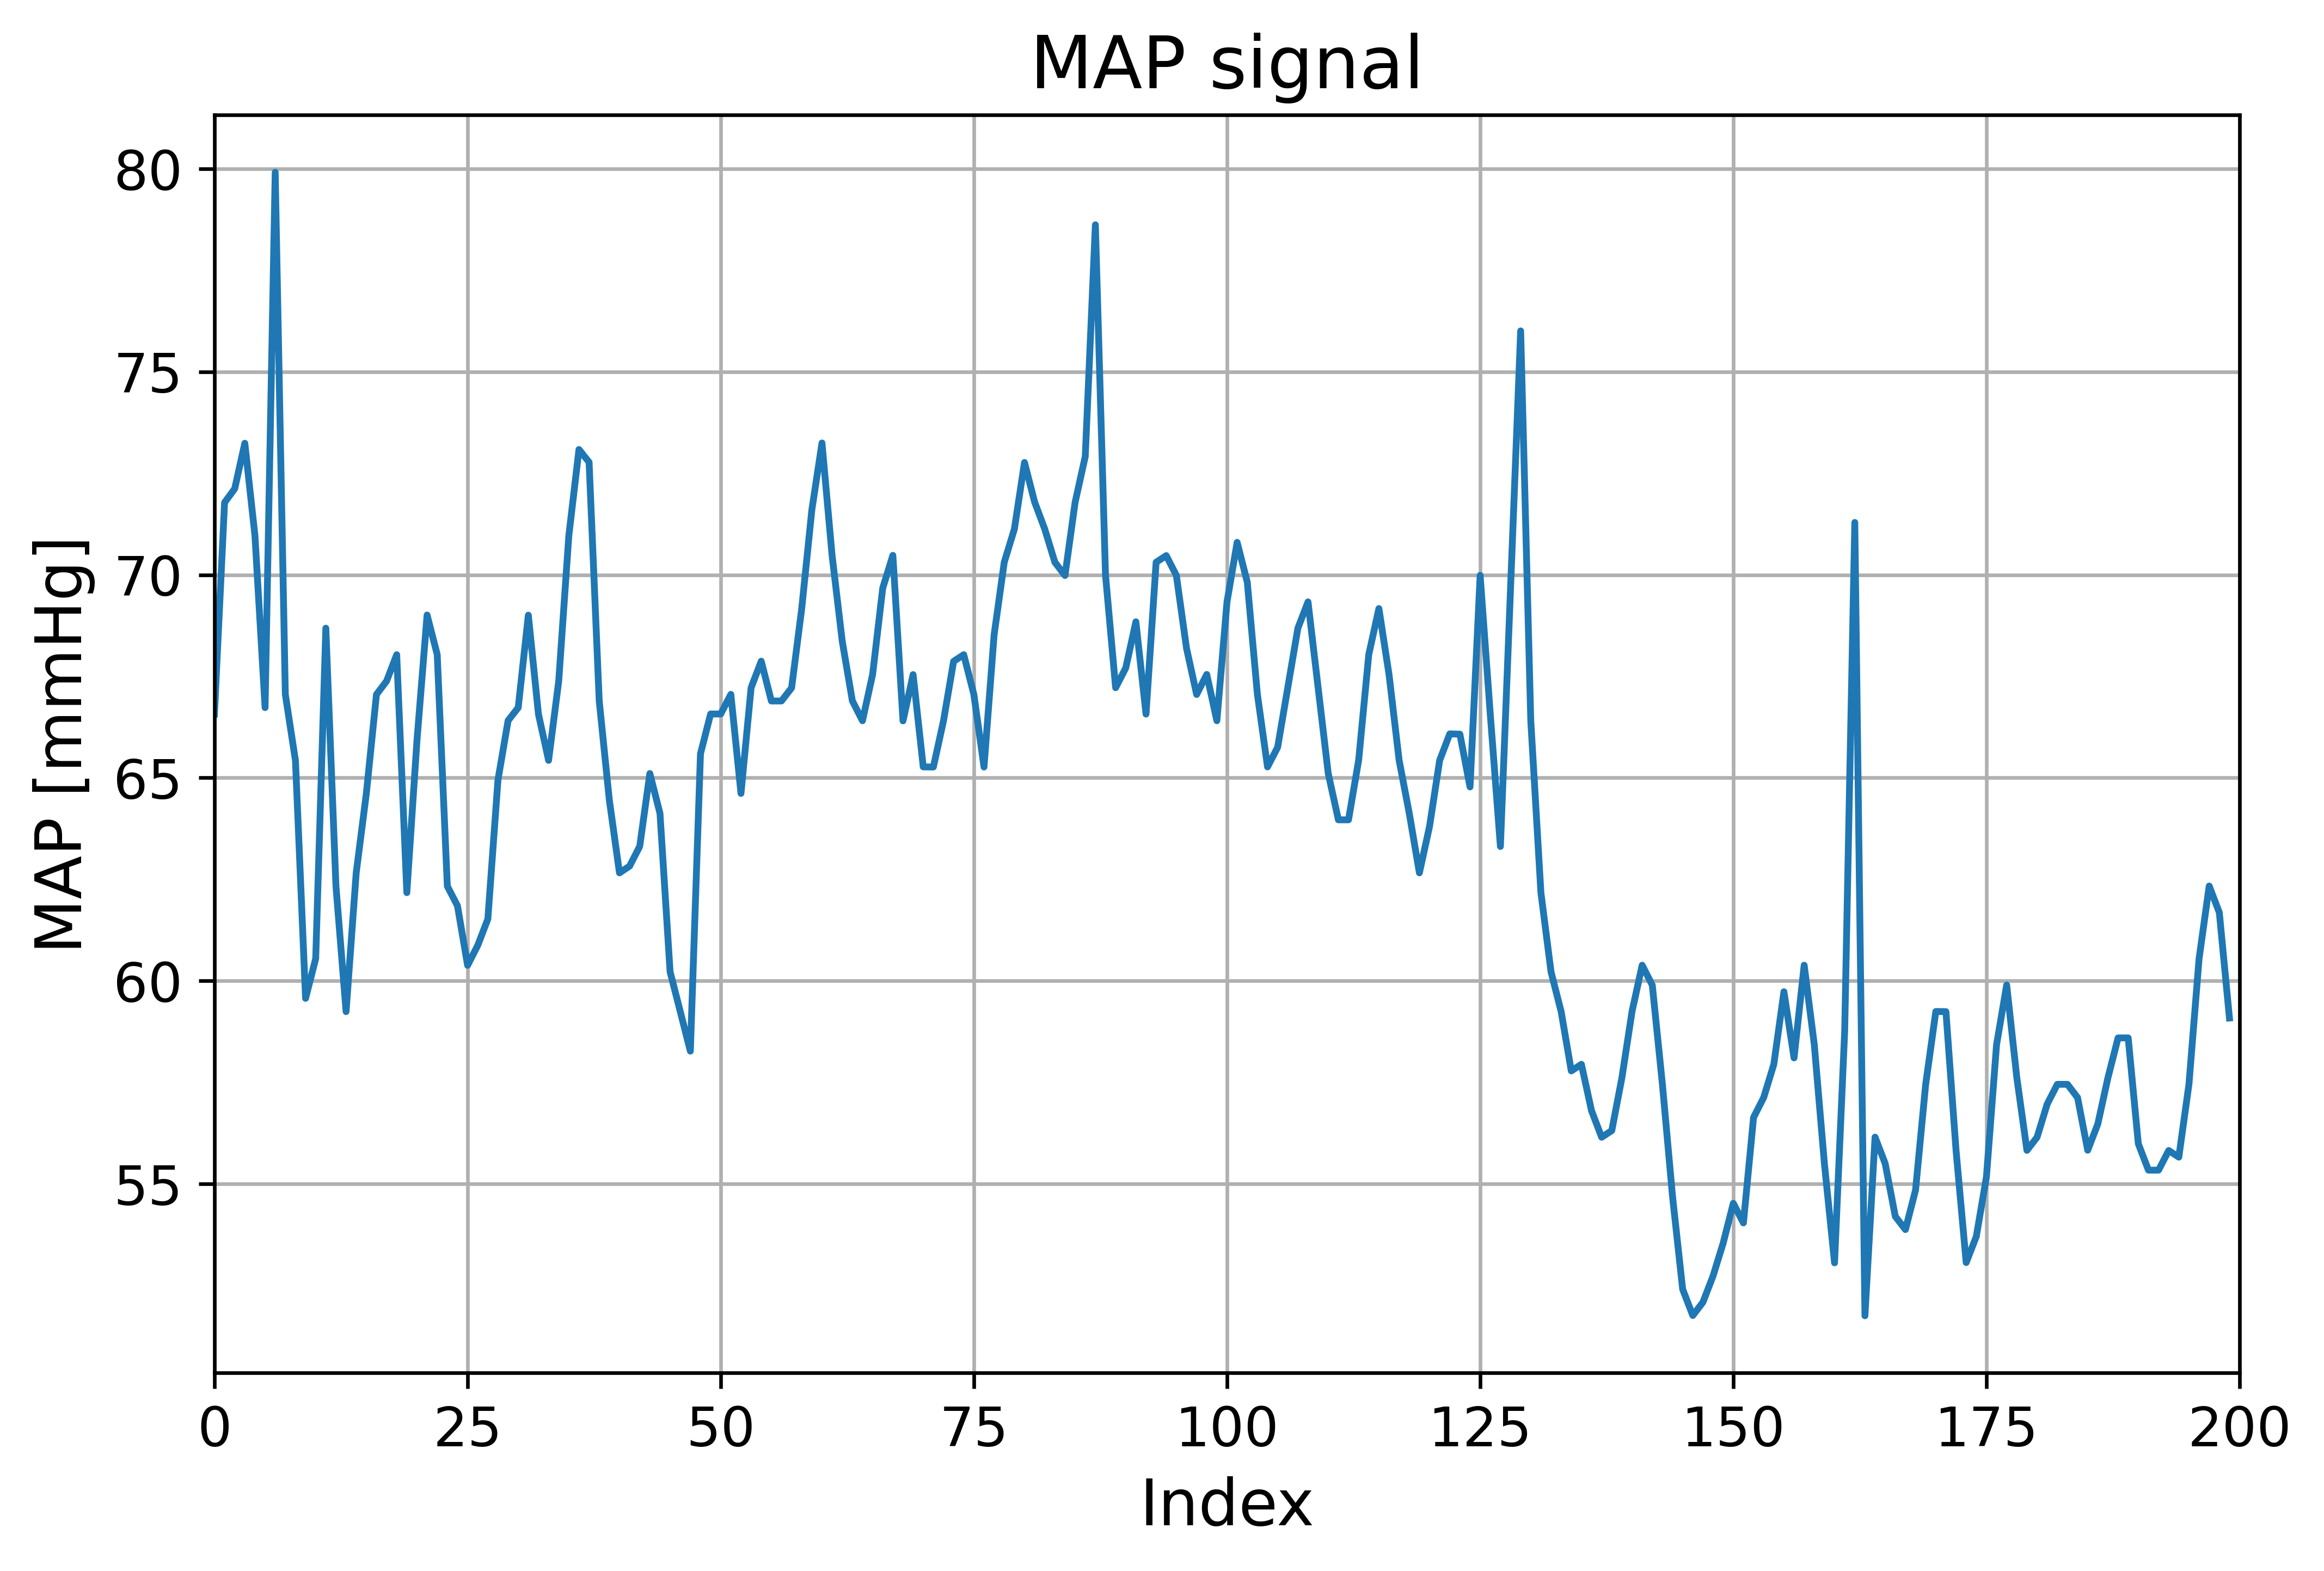

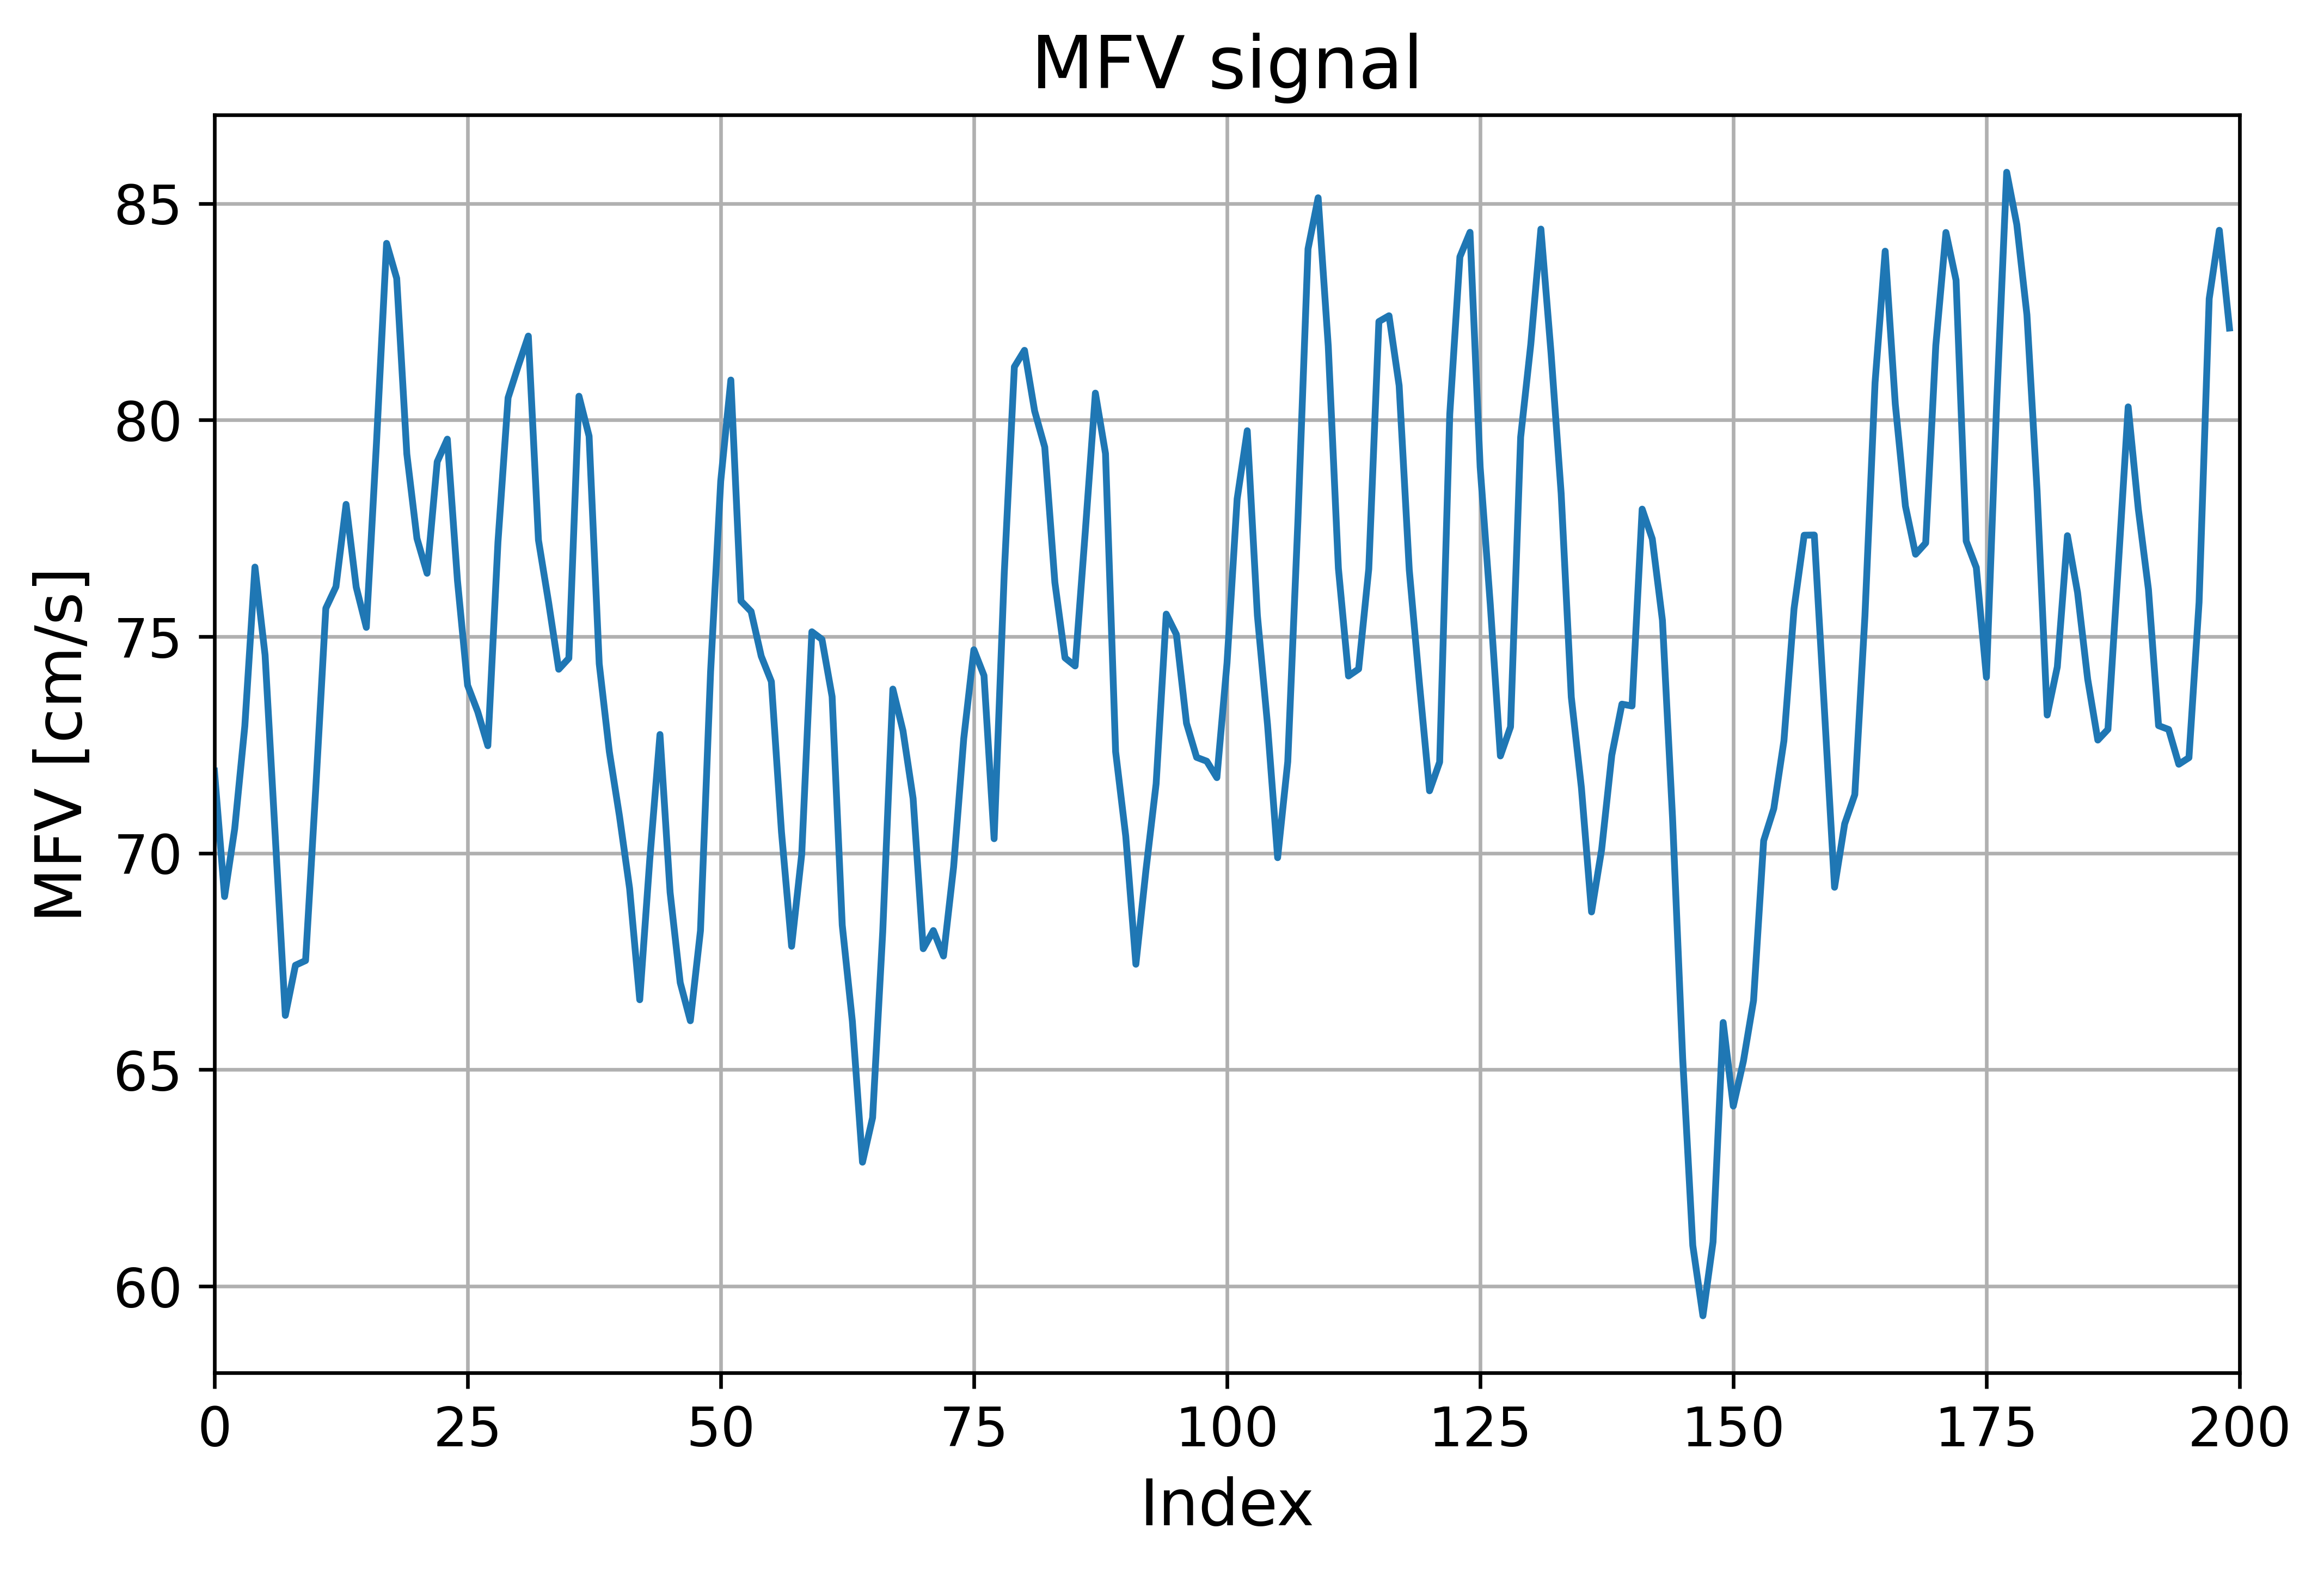

In [331]:
plot_map_signal(map, 0, 200)
plot_mfv_signal(mfv, 0, 200)